In [126]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
import csv
import numpy as np

#Study files

music_norm_path = "songs_normalize.csv"

music_norm = pd.read_csv(music_norm_path, encoding = "utf-8-sig")
#convert duration from milliseconds to seconds and add new column to the df 

music_norm.head(-1)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.0,0.3550,0.894,95.053,pop
1,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.0,0.3470,0.544,119.992,"rock, metal"
2,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.0,0.0845,0.879,172.656,pop
3,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.0,0.0454,0.760,104.504,hip hop
4,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.0267,0.0,0.4670,0.861,103.035,"pop, rock"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934,Post Malone,Goodbyes (Feat. Young Thug),174960,True,2019,1,0.580,0.653,5,-3.818,1,0.0745,0.4470,0.0,0.1110,0.175,150.231,hip hop
1935,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.0,0.1060,0.952,137.958,pop
1936,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.0,0.1050,0.564,169.994,pop
1937,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.0,0.2740,0.811,97.984,"hip hop, country"


## Cleaning the Dataset

In [2]:
# Drop unused columns
music_norm = music_norm.drop(columns=['explicit', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness'])

In [3]:
music_norm

,artist,song,duration_ms,year,popularity,key,loudness,mode,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,2000,77,1,-5.444,0,0.894,95.053,pop
1,Bon Jovi,It's My Life,224493,2000,78,0,-4.063,0,0.544,119.992,"rock, metal"
2,*NSYNC,Bye Bye Bye,200560,2000,65,8,-4.806,0,0.879,172.656,pop
3,Eminem,The Real Slim Shady,284200,2000,86,5,-4.244,0,0.760,104.504,hip hop
4,Robbie Williams,Rock DJ,258560,2000,68,7,-4.264,1,0.861,103.035,"pop, rock"
...,...,...,...,...,...,...,...,...,...,...,...
1935,Jonas Brothers,Sucker,181026,2019,79,1,-5.065,0,0.952,137.958,pop
1936,Taylor Swift,Cruel Summer,178426,2019,78,9,-5.707,1,0.564,169.994,pop
1937,Blanco Brown,The Git Up,200593,2019,69,9,-8.635,1,0.811,97.984,"hip hop, country"
1938,Sam Smith,Dancing With A Stranger (with Normani),171029,2019,75,8,-7.513,1,0.347,102.998,pop


In [4]:
# Check for null values
missing_data_count = music_norm.isna().sum()
missing_data_count

#There is none (see below)

artist         0
song           0
duration_ms    0
year           0
popularity     0
key            0
loudness       0
mode           0
valence        0
tempo          0
genre          0
dtype: int64

In [5]:
# Check for duplicated rows
duplicated_rows = music_norm.duplicated()
music_norm[duplicated_rows].sort_values("song")

,artist,song,duration_ms,year,popularity,key,loudness,mode,valence,tempo,genre
951,Lady Gaga,Bad Romance,294573,2009,80,0,-3.755,1,0.714,119.001,pop
1924,Post Malone,Better Now,231266,2018,80,10,-5.804,1,0.341,145.038,hip hop
1774,Jax Jones,Breathe,207629,2017,58,11,-5.520,0,0.686,125.985,"hip hop, pop, Dance/Electronic"
923,James Morrison,Broken Strings,250453,2008,70,1,-4.914,1,0.321,111.910,"pop, R&B"
1391,Ellie Goulding,Burn,231211,2014,70,1,-5.031,1,0.329,87.016,"pop, rock, Dance/Electronic"
1674,Rob $tone,Chill Bill (feat. J. Davi$ & Spooks),177184,2016,76,6,-10.028,1,0.230,108.034,hip hop
334,Coldplay,Clocks,307879,2002,79,5,-7.215,0,0.255,130.970,"rock, pop"
779,Soulja Boy,Crank That (Soulja Boy),221933,2007,74,0,-2.180,1,0.803,140.141,"hip hop, pop"
760,September,Cry for You,209800,2007,65,9,-3.988,1,0.961,130.018,"pop, Dance/Electronic"
649,The All-American Rejects,Dirty Little Secret,193653,2005,65,10,-4.253,1,0.462,143.853,"rock, pop"


In [6]:
# drop duplicated values
music_norm = music_norm.drop_duplicates()
music_norm

,artist,song,duration_ms,year,popularity,key,loudness,mode,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,2000,77,1,-5.444,0,0.894,95.053,pop
1,Bon Jovi,It's My Life,224493,2000,78,0,-4.063,0,0.544,119.992,"rock, metal"
2,*NSYNC,Bye Bye Bye,200560,2000,65,8,-4.806,0,0.879,172.656,pop
3,Eminem,The Real Slim Shady,284200,2000,86,5,-4.244,0,0.760,104.504,hip hop
4,Robbie Williams,Rock DJ,258560,2000,68,7,-4.264,1,0.861,103.035,"pop, rock"
...,...,...,...,...,...,...,...,...,...,...,...
1935,Jonas Brothers,Sucker,181026,2019,79,1,-5.065,0,0.952,137.958,pop
1936,Taylor Swift,Cruel Summer,178426,2019,78,9,-5.707,1,0.564,169.994,pop
1937,Blanco Brown,The Git Up,200593,2019,69,9,-8.635,1,0.811,97.984,"hip hop, country"
1938,Sam Smith,Dancing With A Stranger (with Normani),171029,2019,75,8,-7.513,1,0.347,102.998,pop


### Find all unique genres

In [7]:
unique_genre = len(music_norm["genre"].unique())
unique_genre

57

In [8]:
unique_artists = music_norm["artist"].unique()
unique_artists 

array(['Britney Spears', 'Bon Jovi', '*NSYNC', 'Eminem',
       'Robbie Williams', 'Modjo', "Gigi D'Agostino", "Bomfunk MC's",
       'Aaliyah', 'Alice Deejay', 'Linkin Park', 'Sonique', 'M.O.P.',
       'Limp Bizkit', 'Darude', 'Da Brat', 'Moloko', 'Chicane',
       'Debelah Morgan', 'Madonna', 'Ruff Endz', 'Kylie Minogue',
       'LeAnn Rimes', 'Avant', 'Toni Braxton', 'Bow Wow',
       'Samantha Mumba', 'Mýa', 'Mary Mary', 'Next', 'Janet Jackson',
       'Ricky Martin', 'Jagged Edge', 'JAY-Z', 'Baha Men', 'Oasis',
       'DJ Ötzi', 'P!nk', 'Mariah Carey', 'Craig David', 'Sammie',
       'Kandi', 'Vengaboys', 'Ronan Keating', '3 Doors Down',
       'Carl Thomas', 'Mystikal', 'Fuel', 'Westlife', 'All Saints',
       "Destiny's Child", 'Erykah Badu', 'Matchbox Twenty', 'Gabrielle',
       'Backstreet Boys', 'The Corrs', 'Joe', 'Nelly', 'Shaggy',
       'Christina Aguilera', 'Nelly Furtado', 'Shakira',
       'Jimmy Eat World', 'Train', 'Geri Halliwell', 'Blu Cantrell',
       'Missy El

In [9]:
# unique_song = music_norm["song"].unique().sort_values()
# unique_song
unique_song = music_norm["song"].unique()
print(sorted(unique_song))

['#SELFIE - Original Mix', '#thatPOWER', "'Till I Collapse", '(When You Gonna) Give It Up to Me (feat. Keyshia Cole) - Radio Version', '...Ready For It?', "03' Bonnie & Clyde", '1 Thing', '1, 2 Step (feat. Missy Elliott) - Main', '1, 2, 3 (feat. Jason Derulo & De La Ghetto)', '17', '1955', '1973', '2 On (feat. ScHoolboy Q)', '2 Phones', '2002', '21 Guns', '21 Questions', '21 Seconds', '212', '22', '24K Magic', '2U (feat. Justin Bieber)', '3 Nights', '3005', '4 Minutes (feat. Justin Timberlake & Timbaland)', '4 My People (feat. Eve)', '6 Foot 7 Foot', '679 (feat. Remy Boyz)', '7 Days', '7 rings', '711', 'A Little Less Conversation - JXL Radio Edit Remix', 'A Milli', 'A Moment Like This', 'A New Day Has Come - Radio Remix', 'A Sky Full of Stars', 'A Thousand Miles', 'A Thousand Years', "A Woman's Worth", 'AM To PM', 'About You Now', "Acceptable in the 80's", 'Adan y Eva', 'Addicted', 'Addictive', 'Adventure of a Lifetime', 'Again', 'Against All Odds (Take A Look at Me Now) (feat. Westlif

In [10]:
def filter_genre(genre): 
    # genre='rock'
    filter_df=music_norm['genre'].str.contains(genre)
    small_df=music_norm.loc[filter_df, :]
    small_df.head()
    return len(small_df)

In [11]:
genre_list=music_norm['genre'].str.split(', ').explode().unique()
genre_list

array(['pop', 'rock', 'metal', 'hip hop', 'Dance/Electronic', 'R&B',
       'country', 'latin', 'Folk/Acoustic', 'easy listening',
       'World/Traditional', 'blues', 'jazz', 'classical'], dtype=object)

In [12]:
for each_genre in genre_list: 
    count=filter_genre(each_genre)
    print(f'{each_genre} contains {count} records')

pop contains 1552 records
rock contains 217 records
metal contains 61 records
hip hop contains 743 records
Dance/Electronic contains 377 records
R&B contains 428 records
country contains 19 records
latin contains 60 records
Folk/Acoustic contains 19 records
easy listening contains 6 records
World/Traditional contains 10 records
blues contains 3 records
jazz contains 2 records
classical contains 1 records


In [13]:
# Split the values in the column
genres = music_norm["genre"].str.split(',', expand=True)
# Convert the list of values into separate rows
# genres = genres.explode("genre")
# Find the unique values
# genres.unique()

In [14]:
genres #test

,0,1,2,3
0,pop,None,None,None
1,rock,metal,None,None
2,pop,None,None,None
3,hip hop,None,None,None
4,pop,rock,None,None
...,...,...,...,...
1935,pop,None,None,None
1936,pop,None,None,None
1937,hip hop,country,None,None
1938,pop,None,None,None


### Analyzing Popularity

#### Popular genre & how they have changed 10 years - Grace

#### Length of Song vs Popularity - Daniel

In [145]:
#plt.figure(figsize=(10, 8))
#plt.scatter(music_norm["genre"],music_norm["loudness"],color="azure",edgecolor='teal', s=20)

# Incorporate the other graph properties
#plt.title("Loudness Vs. Genre")
#plt.xlabel("Genre")
#plt.ylabel("Loudness")
#plt.grid (b=True,which="major",axis="both",linestyle="-",color="black")



# Show plot
#plt.show()

#### Loudness vs popularity - Bree

In [15]:
# separate the original DataFrame by year into 4 new DataFrames
df2000 = music_norm[music_norm['year'] == 2000]
df2001 = music_norm[music_norm['year'] == 2001]
df2002 = music_norm[music_norm['year'] == 2002]
df2003 = music_norm[music_norm['year'] == 2003]
df2004 = music_norm[music_norm['year'] == 2004]

df2005 = music_norm[music_norm['year'] == 2005]
df2006 = music_norm[music_norm['year'] == 2006]
df2007 = music_norm[music_norm['year'] == 2007]
df2008 = music_norm[music_norm['year'] == 2008]
df2009 = music_norm[music_norm['year'] == 2009]

df2010 = music_norm[music_norm['year'] == 2010]
df2011 = music_norm[music_norm['year'] == 2011]
df2012 = music_norm[music_norm['year'] == 2012]
df2013 = music_norm[music_norm['year'] == 2013]
df2014 = music_norm[music_norm['year'] == 2014]

df2015 = music_norm[music_norm['year'] == 2015]
df2016 = music_norm[music_norm['year'] == 2016]
df2017 = music_norm[music_norm['year'] == 2017]
df2018 = music_norm[music_norm['year'] == 2018]
df2019 = music_norm[music_norm['year'] == 2019]

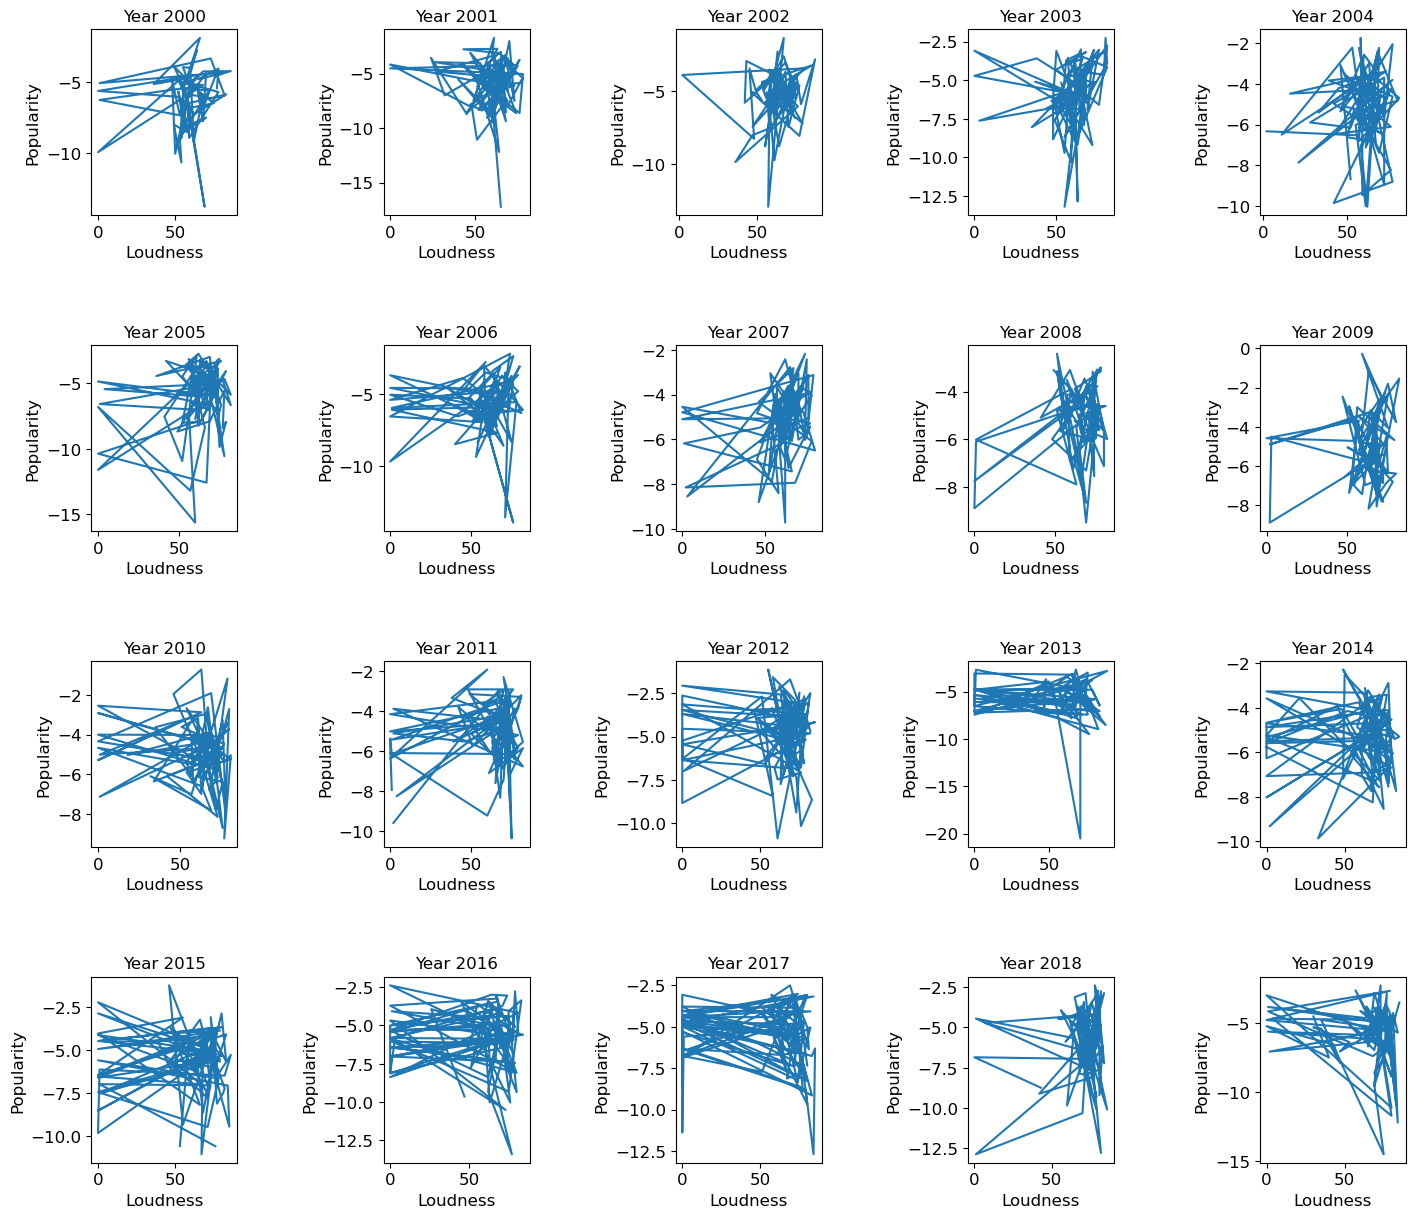

<Figure size 640x480 with 0 Axes>

In [171]:
# plot each DataFrame on a separate subplot
fig, ax = plt.subplots(4, 5, figsize=(14, 12))
plt.rcParams['font.size'] = 12

plt.title("Loudness Vs. Popularity")
fig.tight_layout()  
fig.subplots_adjust(hspace=.7, wspace=1)

ax[0][0].plot(df2000['popularity'], df2000['loudness'])
ax[0][0].set_title('Year 2000', fontsize=12)
ax[0][0].set_xlabel("Loudness",fontsize=12)
ax[0][0].set_ylabel("Popularity",fontsize=12)
ax[0][1].plot(df2001['popularity'], df2001['loudness'])
ax[0][1].set_title('Year 2001',fontsize=12)
ax[0][1].set_xlabel("Loudness",fontsize=12)
ax[0][1].set_ylabel("Popularity",fontsize=12)
ax[0][2].plot(df2002['popularity'], df2002['loudness'])
ax[0][2].set_title('Year 2002',fontsize=12)
ax[0][2].set_xlabel("Loudness",fontsize=12)
ax[0][2].set_ylabel("Popularity",fontsize=12)
ax[0][3].plot(df2003['popularity'], df2003['loudness'])
ax[0][3].set_title('Year 2003',fontsize=12)
ax[0][3].set_xlabel("Loudness",fontsize=12)
ax[0][3].set_ylabel("Popularity",fontsize=12)
ax[0][4].plot(df2004['popularity'], df2004['loudness'])
ax[0][4].set_title('Year 2004',fontsize=12)
ax[0][4].set_xlabel("Loudness",fontsize=12)
ax[0][4].set_ylabel("Popularity",fontsize=12)


ax[1][0].plot(df2005['popularity'], df2005['loudness'])
ax[1][0].set_title('Year 2005',fontsize=12)
ax[1][0].set_xlabel("Loudness",fontsize=12)
ax[1][0].set_ylabel("Popularity",fontsize=12)
ax[1][1].plot(df2006['popularity'], df2006['loudness'])
ax[1][1].set_title('Year 2006',fontsize=12)
ax[1][1].set_xlabel("Loudness",fontsize=12)
ax[1][1].set_ylabel("Popularity",fontsize=12)
ax[1][2].plot(df2007['popularity'], df2007['loudness'])
ax[1][2].set_title('Year 2007',fontsize=12)
ax[1][2].set_xlabel("Loudness",fontsize=12)
ax[1][2].set_ylabel("Popularity",fontsize=12)
ax[1][3].plot(df2008['popularity'], df2008['loudness'])
ax[1][3].set_title('Year 2008',fontsize=12)
ax[1][3].set_xlabel("Loudness",fontsize=12)
ax[1][3].set_ylabel("Popularity",fontsize=12)
ax[1][4].plot(df2009['popularity'], df2009['loudness'])
ax[1][4].set_title('Year 2009',fontsize=12)
ax[1][4].set_xlabel("Loudness",fontsize=12)
ax[1][4].set_ylabel("Popularity",fontsize=12)


ax[2][0].plot(df2010['popularity'], df2010['loudness'])
ax[2][0].set_title('Year 2010',fontsize=12)
ax[2][0].set_xlabel("Loudness",fontsize=12)
ax[2][0].set_ylabel("Popularity",fontsize=12)
ax[2][1].plot(df2011['popularity'], df2011['loudness'])
ax[2][1].set_title('Year 2011',fontsize=12)
ax[2][1].set_xlabel("Loudness",fontsize=12)
ax[2][1].set_ylabel("Popularity",fontsize=12)
ax[2][2].plot(df2012['popularity'], df2012['loudness'])
ax[2][2].set_title('Year 2012',fontsize=12)
ax[2][2].set_xlabel("Loudness",fontsize=12)
ax[2][2].set_ylabel("Popularity",fontsize=12)
ax[2][3].plot(df2013['popularity'], df2013['loudness'])
ax[2][3].set_title('Year 2013',fontsize=12)
ax[2][3].set_xlabel("Loudness",fontsize=12)
ax[2][3].set_ylabel("Popularity",fontsize=12)
ax[2][4].plot(df2014['popularity'], df2014['loudness'])
ax[2][4].set_title('Year 2014',fontsize=12)
ax[2][4].set_xlabel("Loudness",fontsize=12)
ax[2][4].set_ylabel("Popularity",fontsize=12)


ax[3][0].plot(df2015['popularity'], df2015['loudness'])
ax[3][0].set_title('Year 2015',fontsize=12)
ax[3][0].set_xlabel("Loudness",fontsize=12)
ax[3][0].set_ylabel("Popularity",fontsize=12)
ax[3][1].plot(df2016['popularity'], df2016['loudness'])
ax[3][1].set_title('Year 2016',fontsize=12)
ax[3][1].set_xlabel("Loudness",fontsize=12)
ax[3][1].set_ylabel("Popularity",fontsize=12)
ax[3][2].plot(df2017['popularity'], df2017['loudness'])
ax[3][2].set_title('Year 2017',fontsize=12)
ax[3][2].set_xlabel("Loudness",fontsize=12)
ax[3][2].set_ylabel("Popularity",fontsize=12)
ax[3][3].plot(df2018['popularity'], df2018['loudness'])
ax[3][3].set_title('Year 2018',fontsize=12)
ax[3][3].set_xlabel("Loudness",fontsize=12)
ax[3][3].set_ylabel("Popularity",fontsize=12)
ax[3][4].plot(df2019['popularity'], df2019['loudness'])
ax[3][4].set_title('Year 2019',fontsize=12)
ax[3][4].set_xlabel("Loudness",fontsize=12)
ax[3][4].set_ylabel("Popularity",fontsize=12)

plt.show()
plt.savefig('Images/loudness2.png')

/var/folders/6l/3cm6cmdd77gbp_g_t75q5mww0000gn/T/ipykernel_10258/649473222.py:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid (b=True,which="major",axis="both",linestyle="-",color="black")


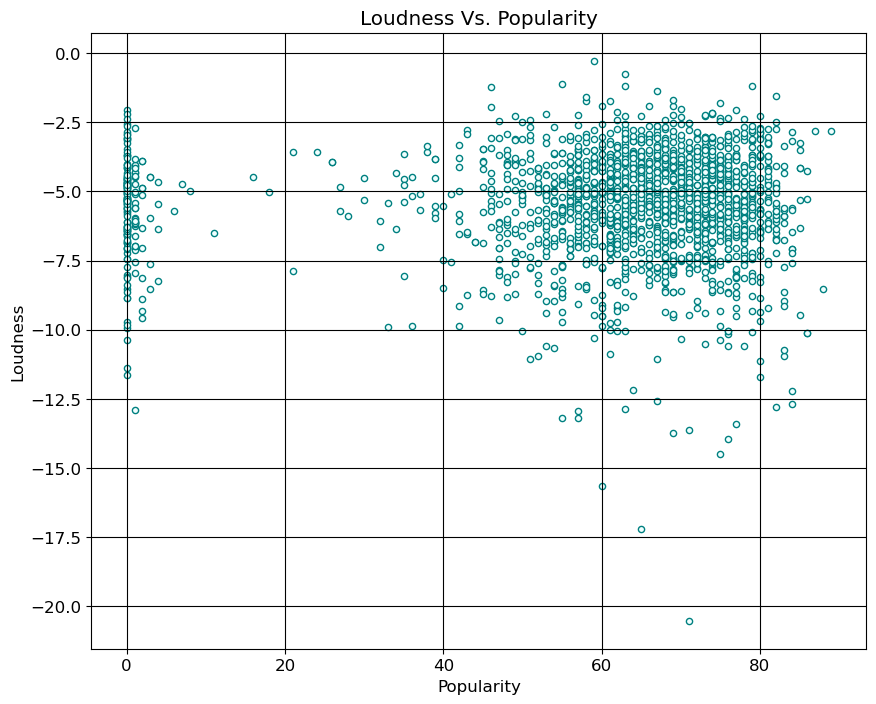

<Figure size 640x480 with 0 Axes>

In [167]:
plt.figure(figsize=(10, 8))
plt.scatter(music_norm["popularity"],music_norm["loudness"],color="azure",edgecolor='teal', s=20)

# Incorporate the other graph properties
plt.title("Loudness Vs. Popularity")
plt.xlabel("Popularity")
plt.ylabel("Loudness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="black")



# Show plot
plt.show()
plt.savefig('Images/loudness1.png')

#### Popularity Vs Loudness Analysis: There is no strong correlation between loudness and popularity. 

#### Loudness vs year- Daniel

####	Duration vs Year- Bree



In [127]:
#convert duration from milliseconds to seconds and then add new column to the df

music_norm_path = "songs_normalize.csv"

music_norm = pd.read_csv(music_norm_path, encoding = "utf-8-sig")

music_norm['duration_s']=music_norm['duration_ms']/1000
music_norm.head(-1)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_s
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.0,0.3550,0.894,95.053,pop,211.160
1,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.0,0.3470,0.544,119.992,"rock, metal",224.493
2,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.0,0.0845,0.879,172.656,pop,200.560
3,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.0,0.0454,0.760,104.504,hip hop,284.200
4,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.0267,0.0,0.4670,0.861,103.035,"pop, rock",258.560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934,Post Malone,Goodbyes (Feat. Young Thug),174960,True,2019,1,0.580,0.653,5,-3.818,1,0.0745,0.4470,0.0,0.1110,0.175,150.231,hip hop,174.960
1935,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.0,0.1060,0.952,137.958,pop,181.026
1936,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.0,0.1050,0.564,169.994,pop,178.426
1937,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.0,0.2740,0.811,97.984,"hip hop, country",200.593


In [128]:
#calculate the average duration vs year
avgdur_year=music_norm.groupby(pd.PeriodIndex(music_norm['year'], freq="y"))['duration_s'].mean().reset_index()
avgdur_year.set_index('year', inplace=True)
avgdur_year

,duration_s
year,
2000,249.993068
2001,242.450065
2002,253.993753
2003,236.334639
2004,233.966533
2005,236.967825
2006,239.061330
2007,231.326500
2008,235.675247


In [51]:
#calculate the max duration vs year
maxdur_year=music_norm.groupby(pd.PeriodIndex(music_norm['year'], freq="y"))['duration_s'].max().reset_index()
maxdur_year.set_index('year', inplace=True)
maxdur_year

,duration_s
year,
2000,452.906
2001,340.920
2002,432.146
2003,366.733
2004,336.506
2005,393.813
2006,448.573
2007,333.680
2008,338.853


In [100]:
#calculate the min duration vs year
mindur_year=music_norm.groupby(pd.PeriodIndex(music_norm['year'], freq="y"))['duration_s'].min().reset_index()
mindur_year.set_index('year', inplace=True)
mindur_year

,duration_s
year,
2000,175.893
2001,165.853
2002,161.240
2003,162.600
2004,171.360
2005,168.879
2006,151.640
2007,165.120
2008,148.186


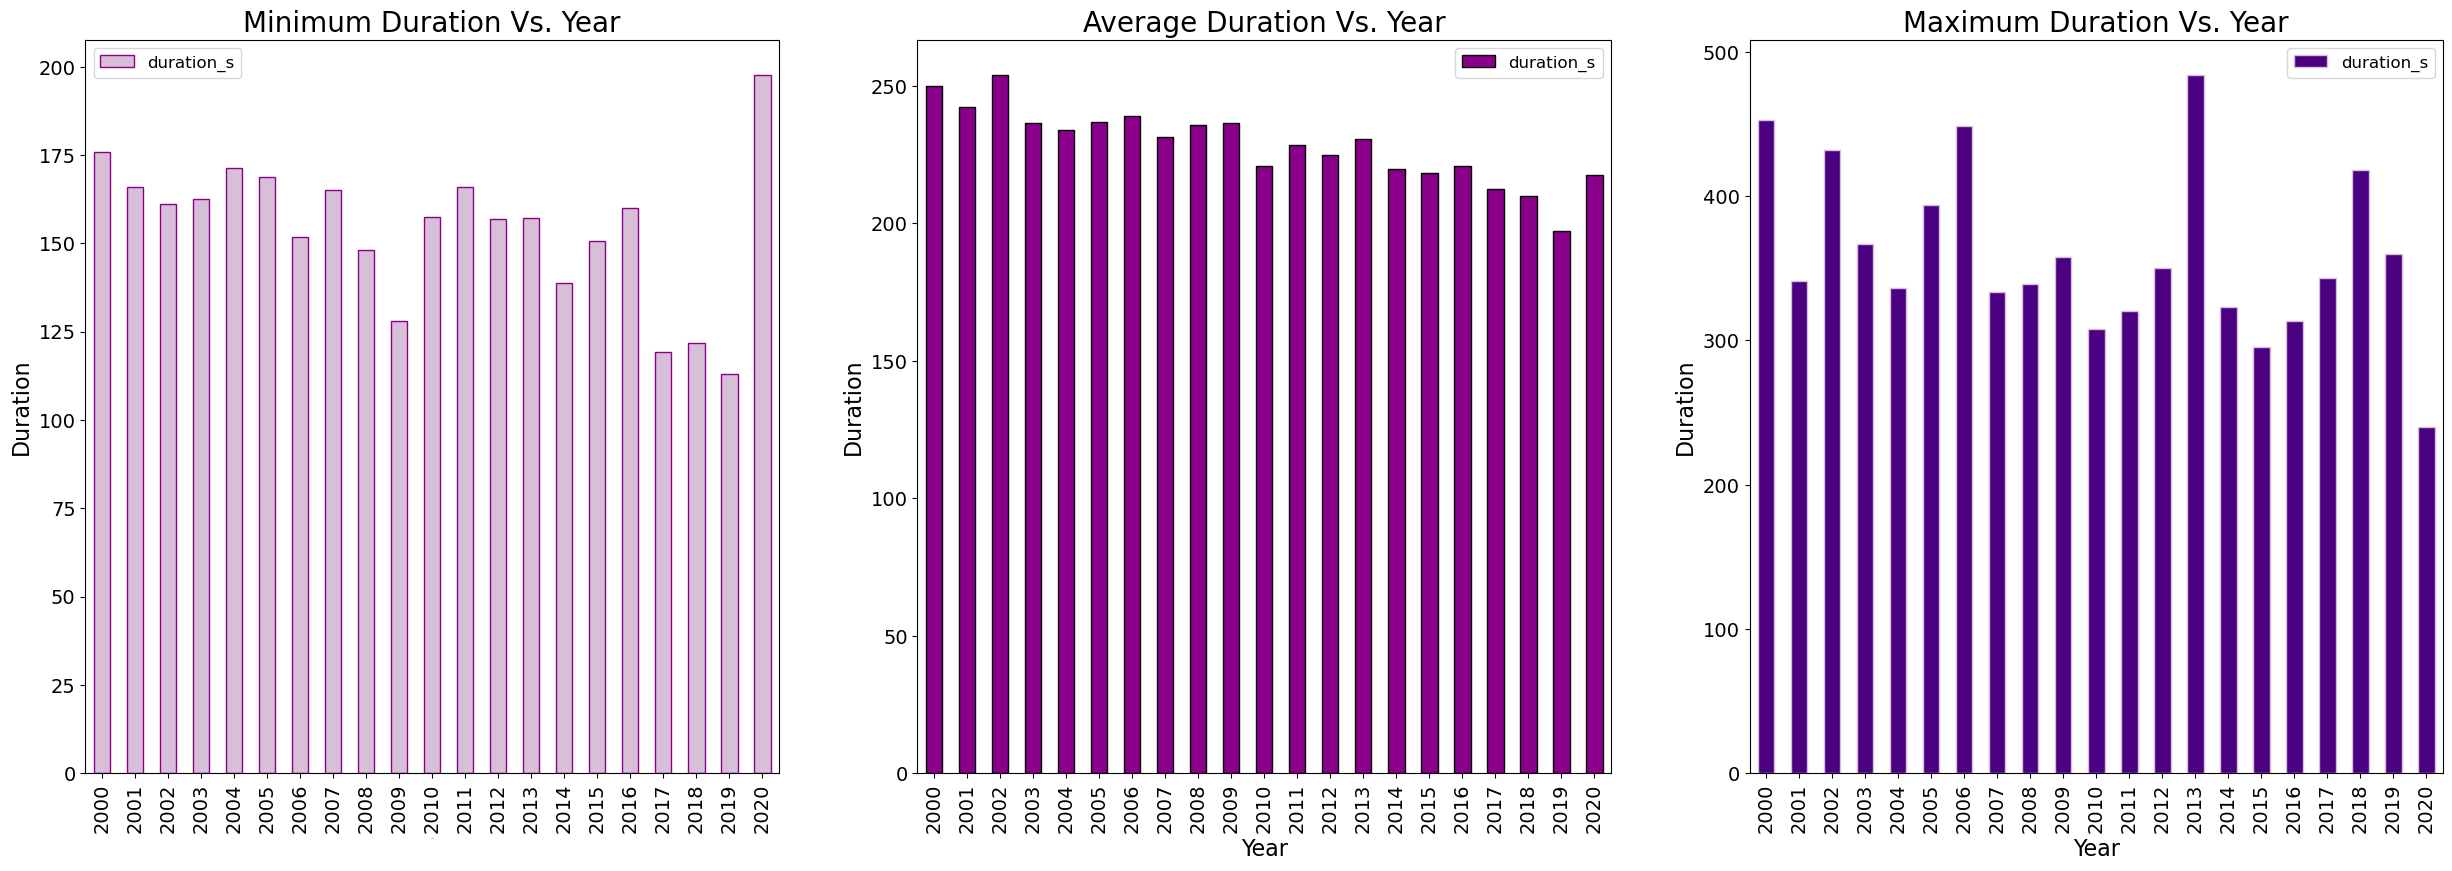

<Figure size 640x480 with 0 Axes>

In [170]:
# plot each DataFrame on a separate subplot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,8))

fig.tight_layout()  
fig.subplots_adjust(hspace=.7, wspace=0.2)
fig.set_size_inches(25, 8)  # width = 18 inches, height = 6 inches

mindur_year.plot.bar(ax=ax1, color='thistle', edgecolor='darkmagenta')
ax1.set_title("Minimum Duration Vs. Year", fontsize=20)
ax1.set_xlabel("Year", fontsize=1)
ax1.set_ylabel("Duration", fontsize=16)
ax1.tick_params(axis='both', labelsize=14)

avgdur_year.plot.bar(ax=ax2, color='darkmagenta', edgecolor='black')
ax2.set_title("Average Duration Vs. Year", fontsize=20)
ax2.set_xlabel("Year", fontsize=16)
ax2.set_ylabel("Duration", fontsize=16)
ax2.tick_params(axis='both', labelsize=14)

maxdur_year.plot.bar(ax=ax3, color='indigo', edgecolor='thistle')
ax3.set_title("Maximum Duration Vs. Year", fontsize=20)
ax3.set_xlabel("Year", fontsize=16)
ax3.set_ylabel("Duration", fontsize=16)
ax3.tick_params(axis='both', labelsize=14)




plt.show()
plt.savefig('Images/duration.png')

#### Duration Vs. Year Analysis: Data shows that over the years the durations of songs have slight gone down with a huge decline in 2020

####	Avg bpm vs year - Grace


####	Valence vs Year- Pooja

### Analyzing Key/mode 



#### Key/mode vs. popularity - Pooja


#### Key/mode vs artist - Kiana 


#### Key/mode vs year - Kiana